# Safety Week 2: Content recommendation

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;"><strong>How to use this notebook</strong></p>
    <div style="padding: 0 0 2px 10px;">

Simply read the text and **follow the instructions**.  
This notebook contains **code cells**, which can be modified and must be **executed** to see the result of their content.  
To execute a cell, select it and click on the play button (▶) in the tool  bar, or type `Shift + Enter` or `Ctr + Enter`.  

As the variables contained in a cell are stored in memory, the **order of execution** of the cells is important !  

</div></div>

Notebook by Eugène Bergeron and the Responsible software team (2024).

Except where otherwise noted, the content of this notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution International License</a> (CC BY 4.0 International).<br/>
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0;margin-top:10px;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>
***

# Introduction
**Recommendation systems** are algorithms that select items (images, web sites, videos, etc…) among a large dataset in order to satisfy the user. They are now everywhere in our life, especially in social media. Their role is to select the few items among a big dataset that might interest the user. Usually, they are developed in order to maximize the satisfaction of the users *(or the time they will spend on the app)*.  

You are a software developper of an **application** that people can use in order **to share [memes](https://en.wikipedia.org/wiki/Meme)**. When users enter the app, they are presented a **selection of memes**, and it is your job to imagine the algorithm behind this selection.    

You are currently working with the ethics department in order to avoid potential risks with your implementation. They will provide you the results of your implemenation in terms of impacts on the users.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Learning goals</p>
    <div style="padding: 0 0 2px 10px;">

**What will be covered**
- Presentation of the framework for simulating the effects of content recommendation algorithms
- 3 implementations of recommendation algorithms:
    - Random recommendation 
    - Advertisement-aware
    - Personalized tastes-driven
- Malicious user detection

**By the end of the session you will be able to:**
- ✅  Implement basic recommendation systems for memes recommendation and see them in action
- ✅  Analyze the impacts of recommendation systems
- ✅  Understand the advantages and disadvantages of each recommendation systems covered  

</div></div>

---

# Simulating how users react to content recommendation

## Imports

In [1]:
from src.simulation import *
from src.tests import *

## Overall principles
In this notebook, we will use a **simulation to explore the impacts of different recommendation systems** you will develop. The overall principles of the simulation as well as the modelisation are explained here. If this is not enough, you can find a more comprehensive explanation at the [end of this notebook](#More-explanations-on-the-simulation) or check directly the code available in the file `Simulation.py`.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;"><strong>Principles</strong></p>
    <div style="padding: 0 0 2px 10px;">

As individuals, we all have personal interests and preferences regarding the content we like, which might evolve over time for countless reasons. The very content we are exposed to might be one of theses reasons, impacting positively or negatively our preferences. The simulation aims at analyzing those changes and the impact of the recommended content.

</div></div>

<br>

<div style="border-left: 6px solid rgba(40, 167, 69, 1); border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); font-weight:bold; padding: 8px 0 8px 15px;"><strong>Modelling of the items and the users</strong></p>
    <div style="padding: 0 0 2px 10px;">
        
Memes are referred to by the word "items".  
Items and Users are characterized by **5 values** in $[-1, 1]$ *(humour, sarcasm, offensive, motivational and overall sentiment)*.  
- For the Items, these values correspond to what emotion they convey. The values have been determined from [this dataset (Memotion dataset 7k)](https://www.kaggle.com/datasets/williamscott701/memotion-dataset-7k). We simply quantized every value, i.e converted the attributes from their text values to numerical values (ex: "hilarious" for the humour has been converted to the value 1, "not_funny" to -1, etc.).  
- For the Users, these values correspond to their tastes, i.e what type of memes they prefer. If they prefer sacarstic memes, the value "sarcasm" in their tastes will be close to 1. A value of 0 means they are indifferent about it.  

</div></div>

## The memes
Memes are available in the `memes` pandas DataFrame (imported in the cell above).

In [2]:
print(f"Number of memes in the dataset: {memes.shape[0]}")
memes.head()

Number of memes in the dataset: 6993


humour  sarcasm  offensive  motivational  overall_sentiment  \
image_name                                                                  
image_0.png     -1.0     -1.0       -1.0             1                1.0   
image_1.jpg      1.0      1.0       -1.0            -1                1.0   
image_2.jpeg    -1.0      1.0       -1.0             1                1.0   
image_3.JPG      0.5     -1.0       -1.0            -1                0.5   
image_4.png      0.5     -0.5        0.5             1                0.5   

                      author  
image_name                    
image_0.png     Celebrations  
image_1.jpg            Roman  
image_2.jpeg           Sybil  
image_3.JPG           Olivia  
image_4.png   Xx_D4rkL0rd_xX

Each meme has its file path as an index and 5 values describing the emotion conveyed ranging from -1 (very negative) to 1 (very positive). For example, a meme with an `overall_sentiment` of 1 means that people might feel good when looking at it while a `humour` score of -1 means that the meme is really not funny. *Little disclaimer: we are not responsible for how memes are considered funny or not, and we disagree with some scores.*

You can visualize a meme using the ``show_meme`` function:

<div style="border-left: 6px solid rgba(220, 53, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(220, 53, 69, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Disclaimer</p>
    <div style="padding: 0 0 2px 10px;">

The memes of the dataset do not reflect the views, opinion or humour of the course team. Viewer discretion is advised as some memes may be shocking, disturbing or contain mature themes.  
If at some point you want to stop seeing memes, feel free to remove all occurences of the `show_meme` function.

</div></div>

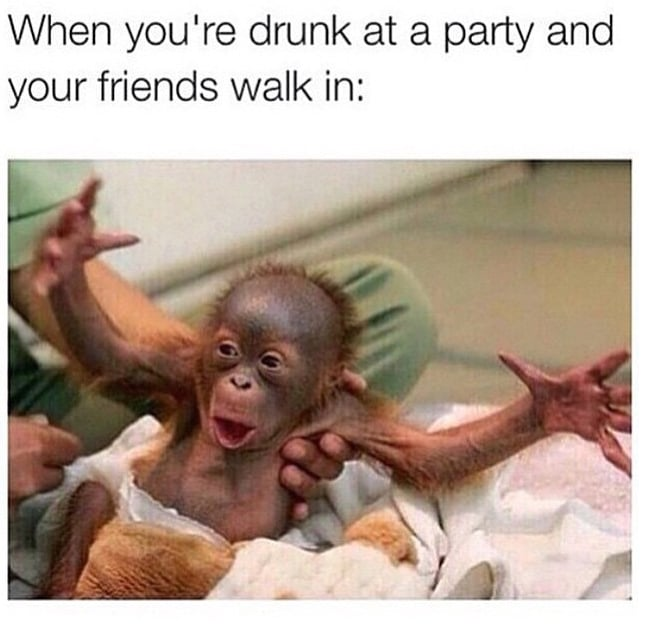

In [3]:
# this cell may take some time to run the first time
show_meme(memes.iloc[5000].name)

## The users
Users are available in the dataframe `init_users`. This frame must not be modified ! If you need to modify a user, first make a copy of the frame with `init_users.copy()`. If you made a mistake, just re-run this cell.

In [4]:
nb_users = 5
# Generate users
init_users = generate_users(nb_users)
# Display 5 lines
init_users.head()

name    humour   sarcasm  offensive  motivational  \
0          Quentin  0.273923 -0.460427  -0.918053     -0.966945   
1   Xx_D4rkL0rd_xX  0.213272  0.458993   0.087250      0.870145   
2          Charlie -0.994523  0.714809  -0.932829      0.459311   
3           Walter  0.082922 -0.400576  -0.154626     -0.943361   
4  An Unnamed cell  0.341249  0.294379   0.230770     -0.232645   

   overall_sentiment  
0           0.626540  
1           0.631707  
2          -0.648689  
3          -0.751433  
4           0.994420

***
# Implementing recommendation algorithms

## Random recommendation

In order to familiarize yourself with the framework, we will begin with a very trivial recommendation system. We code them in a `selector`: a function that takes 3 arguments: the `items`, **a** `user` and `k`, the number of items that should be returned, **as a DataFrame**. The set of items returned is called a **slate**, they are the items that are presented to the user when he starts the app.  

As you just have been hired, the first recommendation system that you will code must returns a random selection of memes.

Let's first see how you can randomly select a meme among the dataset. Use the function [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) !
Note that you can simply do `Shift+Tab` on a method when you are coding to see its documentation, or type `function??` and run the cell.

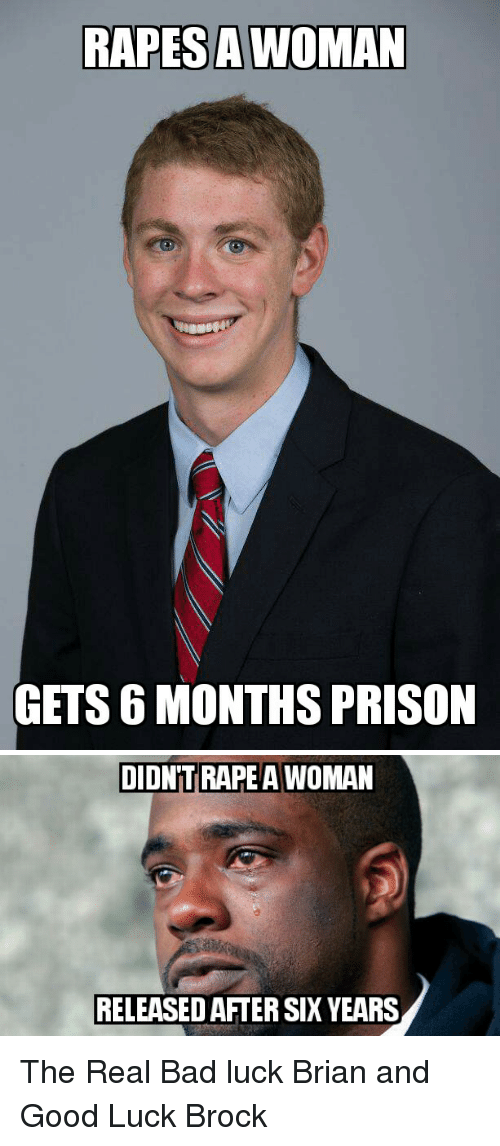

In [5]:
meme = memes.sample(1) # returns a dataframe ! Even if there is only 1 row in it
show_meme(meme.iloc[0].name)

**And now it is time for you to implement the recommendation algorithm !**

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the `selector_random` function so that:
- It returns a dataframe of `k` random items 
        
</div></div>

In [6]:
k = 5

def selector_random(items, user, k):
    """
    :param items: list of all items from which to select
    :param user: user for whom to select the items
    :param k: number of items to select
    return: (DataFrame) a slate of k items drawn randomly from the dataset of items, regardless of the user.
    """
    ### YOUR CODE HERE
    return items.sample(k)

Let's see how your recommendation system affects the users !

The function `simulate_and_render`, implemented in `Simulation.py`, is used to simulate a recommendation system and shows its effects. *You do not need to understand how it works in order to complete the exercises*.

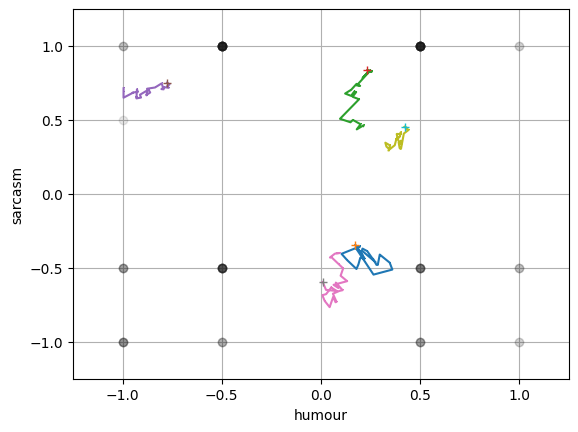

In [7]:
# simple function that will be run to add some items in the plot
cols = ["humour", "sarcasm"]  # you can modify the columns to plot in other axis (2 columns necessary)
simulate_and_render(init_users, memes, selector_random, col=cols, nb_steps=30, custom=custom_items_plotting(memes, cols, nb_items = 100))

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">How to interpret the results?</p>
    <div style="padding: 0 0 2px 10px;">

Below is the output of a simulation with 5 users:
        
<img src="res/sim_tastes.png" alt="Simulation output explanation" style="width:550px;"/>

The grey points are the items (memes), their position are determined by their attributes. One grey point can represent several items (see some points are darker than others). For example, there is a greater number of memes with (humour,sarcasm) = (0.5,1.0) than (humour,sarcasm) = (1.0,1.0). 
        
The paths represent the evolution of the users' tastes with the cross indicating a user's tastes at the end of the simulation. One can see that the user with the green path enjoys more and more humoristic content for example.
</div></div>
<br>
You can launch the cell several times to see that no user is determined to converge to a certain point in the graph and their walk can be very chaotic, which is expected from a full random dataset.

**Congratulation !** You just made your first recommendation algorithm !  
It may be simple, but the ethic department of the software is happy about it as it doesn't harm anyone.  

The marketing department, however, is not really happy about it, as it doesn't attract users nor brands...

## Advertisement

The brand "Celebrations" has contacted the application to make some custom advertisement.  
You come to an agreement for the way you will do it: you will systematicaly **put in 2nd position of the slate the item corresponding to their products** *(reminds you of some real life recommendation systems ?)*.  
The rest of the recommendations stays random.   

Before we start implementing the recommendation algorithm, we need to introduce you to [pd.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html). It is a function that allow to stack row-wise several Dataframes or Series.

In [8]:
# Let's generate some fake dataframes
first_df = pd.DataFrame([[0, 1, 2], [1, 2, 3], [2, 3, 4]], index=['row 1', 'row 2', 'row 3'])
second_df = pd.DataFrame([['a', 'b', 'c']], index=['letters'])
third_df = pd.DataFrame([[10, 10, 10]])

# And look at the result of the concatenation
concatenation = pd.concat([first_df, second_df, third_df])
display(concatenation)

0   1   2
row 1     0   1   2
row 2     1   2   3
row 3     2   3   4
letters   a   b   c
0        10  10  10

Now here is an example with our memes:

In [9]:
# Select some memes
two_first_memes = memes.iloc[:2] # [:2] selects all columns, but only 2 rows
two_random_memes = memes.sample(2) # random selection
third_meme = pd.DataFrame([memes.iloc[2]]) # [2] selects only the line with index 2 /!\ we need to put it in a DataFrame, as it is alone 

# Look at the result of the concatenation
display(
    pd.concat([two_first_memes, two_random_memes, third_meme])
)

humour  sarcasm  offensive  motivational  overall_sentiment  \
image_0.png       -1.0     -1.0       -1.0             1                1.0   
image_1.jpg        1.0      1.0       -1.0            -1                1.0   
image_2822.jpg    -0.5     -0.5        1.0            -1                0.5   
image_4770.png     1.0      1.0       -0.5             1                0.5   
image_2.jpeg      -1.0      1.0       -1.0             1                1.0   

                      author  
image_0.png     Celebrations  
image_1.jpg            Roman  
image_2822.jpg      GigaChad  
image_4770.png          Niaj  
image_2.jpeg           Sybil

Good ! Now that we have seen how to stack DataFrames, here is the item to promote:

<img src="res/celebrations.png" alt="Item to promote" style="width:300px;"/>

It is available in the ``item_to_promote`` variable:

In [10]:
item_to_promote = memes.iloc[0]
print(item_to_promote)

humour                       -1.0
sarcasm                      -1.0
offensive                    -1.0
motivational                    1
overall_sentiment             1.0
author               Celebrations
Name: image_0.png, dtype: object


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the function `selector_advertisement` so that:
- It returns a data frame that consists of:
    - `k-1` random items
    - the `item_to_promote`, put in 2nd position of the slate

Note that `item_to_promote` does not need to be passed in argument to the function as its value has already been saved in memory with the previous cell !
        
</div></div>

In [11]:
def selector_advertisement(items, user, k):
    """
    :param items: list of all items from which to select
    :param user: user for whom to select the items
    :param k: number of items to select
    return: a slate consisting of the selected item, and k-1 random items. Order matters !
    """
    ### YOUR CODE HERE
    return pd.concat([items.sample(1), pd.DataFrame([item_to_promote]), items.sample(k-2)])

test(selector_advertisement)

🆗 Tests passed ! =)


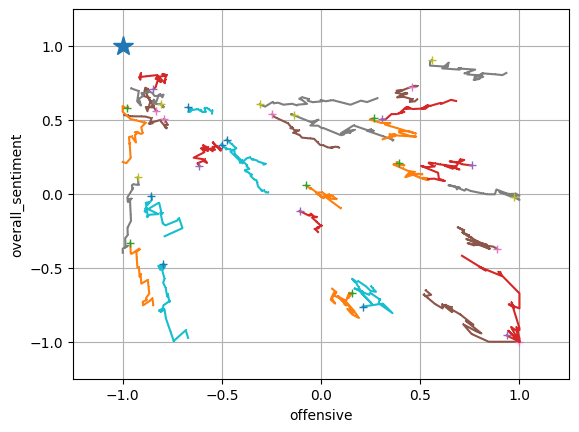

In [12]:
cols = ["offensive", "overall_sentiment"]

init_users = generate_users(30)
simulate_and_render(init_users, memes, selector=selector_advertisement, col=cols, nb_steps=30, custom=plot_item_to_promote(item_to_promote, cols))

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

**Analysis of the result:**  
Before answering, feel free to re-run the previous simulation by changing the parameters (features, number of steps, number of users,...)
- Can you guess what the blue star represents ?  
- Do you think the results are satisfying for the brand ? Have the users' tastes been impacted positely with respect to the brand ?  
- (optional) Try plotting according to other columns. Do you get the same results ? What could be an explanation for very different results ?  

**Reflection question:**
- This time the request came from a candy brand. What could be the negative effect of such results? What if other types of brands ask for the same solution? 

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

**Analysis:**         
- The blue star represents the `item_to_promote`.
- The results depend on which features one visualizes the simulation as the tastes do not always converge to the blue star. For cols = ["offensive", "overall_sentiment"], the tastes look to converge quite well and Celebrations might be super happy with the results of the deal, as more and more customers buy their products. 
- For example, if we plot with respect to `humour` and `motivational`, we can see much more random walks. One explanation is that the dataset of memes is unbalanced, so the users gets to see more memes that are opposed to the item_to_promote, so the the effect of the advertisement are balanced by the opposite memes the users will get to see.   

**Reflection:**     
- The negative effect could be the overconsumption of candies, which could have a bad impact for people dealing with obesity for instance. If the item to promote contained false informations, or if it was political content, it could have massive manipulation potential. If the brand was not "Celebrations" but a malicious actor, the consequences would have been terrible.  

The origin of those effects will be seen in class this week ;)

</div></div>
<br/>
<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Note</p>
    <div style="padding: 0 0 2px 10px;">
        
In reality, those effects are extremely attenuated: in the case of the simulation the effects are amplified comparing to real life impacts.  
But can't you name one or many brands that are omnipresent in the advertisement world ?   
For example, we can see countless advertisements for [Coca-Cola](https://medium.com/@SewemaUniversity/coca-cola-zoom-sur-la-strat%C3%A9gie-marketing-dune-marque-qui-a-marqu%C3%A9-les-esprits-pendant-des-fbb1348eafe2) on every media, the brand try to be everywhere and associate their image with good moments.
            
</div></div>

## Tastes recommendation

As more and more users use the application and more and more items are added, you are asked to complexify your algorithm such that it takes into account the tastes of the user.  
One way to do it is to recommend items that are the closest to a user's tastes, which requires to compute the euclidean distance between the items' characteristics and a user's tastes. We provide you the function to do it:

In [13]:
# We provide you this function that computes the euclidean distance between each row of a table (that can contain the items) and a vector (that can be a user). Use it wisely.
def dist(rows, vec):
    """
    Compute the euclidean distance between all rows of a DataFrame and a Series (or a vector).
    The provided DataFrame and Series must contain only numerical values ! No string !
    """
    # converting whatever is given to numpy in order to be able to apply linalg.norm
    rows_ = rows.to_numpy(dtype=np.float64)
    vec_ = vec.to_numpy(dtype=np.float64)
    return np.linalg.norm(rows_ - vec_, axis=1)

Since this function cannot work with columns that contain non-numerical values.
We provide you with an array-like variable called `categories` that you can use to select only numerical columns in the memes and user dataframes:

In [14]:
print(categories)
memes[categories].head()

Index(['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment'], dtype='object')


humour  sarcasm  offensive  motivational  overall_sentiment
image_name                                                               
image_0.png     -1.0     -1.0       -1.0             1                1.0
image_1.jpg      1.0      1.0       -1.0            -1                1.0
image_2.jpeg    -1.0      1.0       -1.0             1                1.0
image_3.JPG      0.5     -1.0       -1.0            -1                0.5
image_4.png      0.5     -0.5        0.5             1                0.5

In order to get the closest item to a user's tastes, you will need to be able to sort the dataframe of items by the distance to the user's tastes.  
The example below demonstrates how to sort the dataframe `memes` with respect to the `humour` feature using the function [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) and its parameter `ascending`.  
Let's see what's the funniest meme in the list !

In [15]:
# sort the memes dataframe on the "humour" feature by decreasing value
sorted_by_humour = memes[categories].sort_values("humour", ascending = False)

# display the top lines of the result (the humour values should be 1.0 for all of the rows)
display(sorted_by_humour.head())

# display the first in the list, supposedly the funniest of the list
print("One of the supposedly funniest meme in the list:")
show_meme(sorted_by_humour.iloc[0].name)

humour  sarcasm  offensive  motivational  overall_sentiment
image_name                                                                 
image_2286.jpg     1.0      1.0       -0.5             1               -0.5
image_6291.jpg     1.0      1.0       -1.0            -1                0.0
image_6286.jpg     1.0      1.0       -0.5            -1                0.5
image_6293.jpg     1.0     -0.5       -1.0             1               -0.5
image_2263.png     1.0      0.5       -0.5            -1                0.5

One of the supposedly funniest meme in the list:


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 10px 10px;">

Complete the function `selector_tastes` so that:
- It returns the `k` items closest to the users' tastes.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Tips</p>
    <div style="padding: 0 0 2px 10px;">
        
- For each item, compute its distance with one given user (see the function `dist`) and put the result in a new column of `items` called `dist_with_user`
- You may only need to put the values of the `categories` inside the `dist` function, namely `author` must not be included.
- Sort the augmented `items` dataframe with respect to the distance computed (see the function `sort_values`)
- Don't forget that the function only outputs the `k` items, see the function `head`.
        
</div></div>
</div></div>

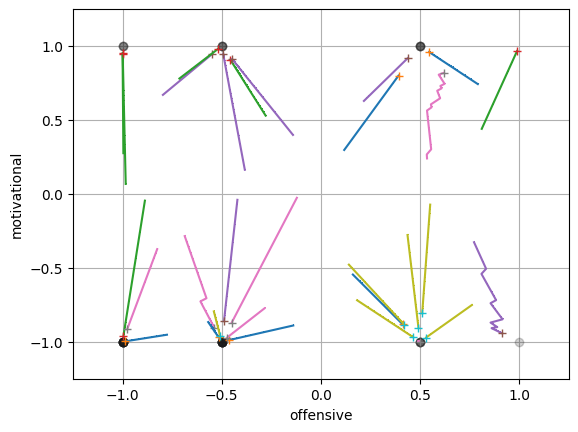

In [16]:
def selector_tastes(items, user, k):
    """
    :param items: list of all items from which to select
    :param user: user for whom to select the items
    :param k: number of items to select
    return: a slate which takes the items that best suit the user's tastes
    """
    ### YOUR CODE HERE
    # Compute the distance between the user and each item, don't forget to consider only the categories !
    # items["dist_with_user"] = ...
    # 
    # Sort the items dataframe
    # ...
    # return ...
    
    # compute the distance between the user and each item
    items["dist_with_user"] = dist(items[categories], user[categories])
    # sort the items by distance
    items = items.sort_values("dist_with_user")
    # return the k closest items
    return items.head(k)

# Unit test, if it doesn't work, your implementation is wrong :/
# try to print the user's tastes and compare it to what you return, is it coherent ?
test_values(selector_tastes(memes, pd.Series({"name": "Yohan", "humour": 0, "sarcasm": 0, "offensive": 0, "motivational": 0, "overall_sentiment": 0}), 2).index.to_list(), "selector_tastes")

init_users = generate_users(30)
cols=["offensive", "motivational"]
simulate_and_render(init_users, memes, selector=selector_tastes, col=cols, custom=custom_items_plotting(memes, cols, nb_items = 100), nb_steps=30)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

**Analysis:**
- Comment the results.
        
**Reflection:**
- Let's step back. Your recommandation system will give to users only the content that correspond to their tastes. What could be some negative consequences of this ?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

**Analysis feedback**  
- One can see that the users' tastes are being amplified, positively as well as negatively. Over a larger number of steps we could imagine having two different groups of users with completely different tastes.  
- The algorithm tends to separate people that were close in tastes and create poles of tastes around the items.  

**Reflection feedback**  
- This results can become problematic on a large scale. In a news website for example, people could get to see only news that reinforce their opinion.
        
</div></div>

The users are very satisfied and you get very great reviews !    
While this is awesome for the marketing department, the ethics department doesn't like it very much. You come to an compromise to resolve this issue by putting 2 items that are completely random at the top of the slate, 50% of the time. It forces the users to be more exposed to variety.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0px 10px 10px;">

Complete the function `selector_tastes_with_50p_random` such that:
- It returns the `k` items closest to the user's tastes
- 50% of the time, 2 random items replace the top ones.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Note:</p>
    <div style="padding: 0 0 2px 10px;">
        
- You can reuse the code of `selector_tastes` to compute the distance and sort the values.
- Look at the method [np.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) to deal with the 50% probability.
        
</div></div></div></div>

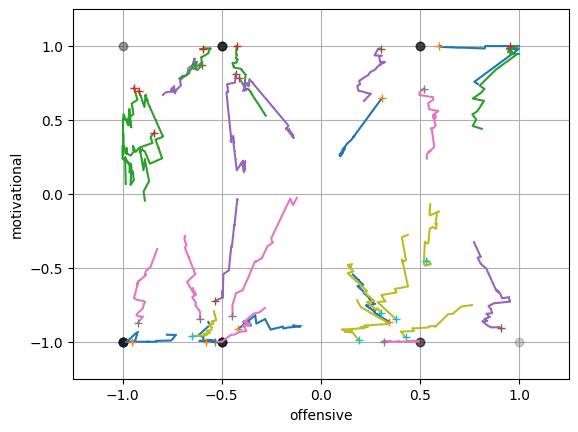

In [17]:
def selector_tastes_with_50p_random(items, user, k):
    """
    :param items: list of all items from which to select
    :param user: user for whom to select the items
    :param k: number of items to select
    return: a slate that takes the items that best suit the user's tastes 
    and 50% of the time: a random item in first place
    """
    # compute the distance between the user and each item
    items["dist with user"] = dist(items[categories], user)
    
    # sort the items by distance
    items = items.sort_values("dist with user")

    # 50% of the time, replace the first two items at the top with a random selection
    if np.random.randint(0, 100) < 50:
        return pd.concat([items.sample(2), items.iloc[:k-2]]) 
    
    return items.iloc[:k]

cols=["offensive", "motivational"]
simulate_and_render(init_users, memes, selector=selector_tastes_with_50p_random, col=cols, custom=custom_items_plotting(memes, cols, nb_items = 100), nb_steps=30)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

Is it better than before ? Why ?

Do you think there can be a better compromise ?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
While it does not fix the problem, we can see that some users have converged to different points than before, and are more spread around the items. This means that someone that previously would only see motivational content will now get to see some hilarious memes!  

Another compromise can be to systematically put an item that is sufficiently different from what the user is used to. You can try it or try your idea by your self!
        
</div></div>


With this experiment you realize the responsability on your shoulders of the fact that you can manipulate as you wish the centers of interest of the users of your app without their knowing. Also the phenomena of clusters formation in the content consumed in social medias is known as **polarization**. It exists in a political form in the U.S.A. which can lead to problems during election... More on that in the videos !

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Note</p>
    <div style="padding: 0 0 2px 10px;">

This exercise deviated from reality by 2 things:
- We perfectly know the tastes of the users in real time, while in reality approximations must be done and they evolve with the choices of the user.
- In our simulation, recommending a content that satisfies a user's tastes has a very high probability to have a positive impact, we don't take into account the possibility that a user might become bored of seeing a certain type of content.

</div></div>

## Nowhere to be safe ?

In [18]:
# Run this cell before you start the next exercise. It won't work otherwise
memes, init_users = obfuscation(memes, init_users, lambda x: (x**3) * 27, chr, 115)
init_users = generate_users(20)

As you have taken the wonderful course Responsible Software, you decide that it is better to avoid certain manipulation effects that you will see in the coming videos. You tell this to your boss and the ethics department and you all agree that the best strategy to use is be as neutral as possible. Therefore, a decision is made to use only the random recommendation system while no other solution is found.
This works well and more and more users use your software. You accept every new user and you add a feature to let users add their memes to the database.    

But after some time you start to get some complaints from users who see very often the same type of content. They accuse the app to lie about its neutrality.

You decide to investigate and your first reaction is to go check the measured tastes of the users. 

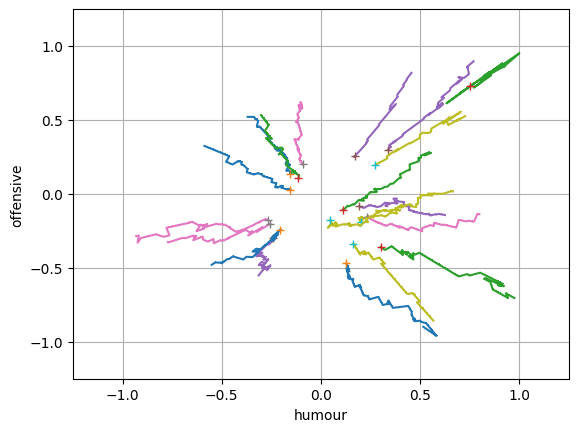

In [19]:
simulate_and_render(init_users, memes, selector=selector_random, col=["humour", "offensive"], nb_steps=100)

That was unexpected ! It has nothing in common with the first time you used that recommendation algorithm...  
Now it is your turn to discover who is behind this mess. Users have a name and items have an author. Your goal is to find the name or the author who is responsible for this result.   
You don't have to look into the code nor manipulate it in order to find the culprit. Try to think about what can a user do to manipulate the whole software.  

Once you have found it, simply put its name in the cell below !
You can use the empty cell in order to print or visualize things.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Try to discover who is responsible for those behavior. You can use the cell below to print, display, simulate, ... Do what you think is necessary !  
Once you have find it, put the name or the author in the cell below to check your answer !

- You do not need to dig into the file `Simulation.py` in order to find the answer !
- The methods [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) could be a great help.
        
</div></div>

In [20]:
# Do whatever is necessary here detective (⌐■_■)
print(memes["author"].sample(50).tolist()) # We can have here a first seeing that there is a problem

print()
# Just to be sure we can do some statistics:
memes_by_author = memes.groupby("author").count()["humour"]
print(memes_by_author) # Here it is clear that Mallory doesn't play according the same rules. 

# Another case solved !

['Mallory', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Roman', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Bob', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Leander', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Yohan', 'Franck', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Ivan', 'Mallory', 'Franck', 'David', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Alice', 'Mallory', 'Mallory', 'Mallory', 'Mallory', 'Sybil', 'Mallory', 'Mallory', 'Mallory', 'Kurt']

author
Alice                255
An Unnamed cell      233
Bob                  241
Celebrations           1
Chad                 225
Charlie              227
David                257
Eve                  221
Franck               233
GigaChad             269
Heidi                255
Ivan                 258
Judy                 248
Kurt                 252
Leander              250
Ludovic              290
Mallory            27000
Mike                 266
Niaj         

In [21]:
answer = "Mallory"
print("This is not the correct answer..." if not verification(answer) else "You got it !")

You got it !


<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Once you got the answer... </p>
    <p style="padding: 0 0 2px 10px"> Click on the "..."</p>
</div></div>

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Analysis of the problem</p>
    <div style="padding: 0 0 2px 10px;">

What did she do to manipulate all users ?
- [ ] She spammed the app with the same image
- [ ] She modified all images
- [ ] She altered the selector to put her images in priority

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
She spammed the app with the same image. By this, when the selector chose a meme at random, it has a very high probability to pick Mallory's image.

</div></div>

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

What can be the dangers of this manipulation of the application ?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
Imagine if it was a false information that were spread massively, or some political content, etc... We will see in the videos that it is dangerous to post false informations and why they have so much effects on people.
        
</div></div>

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Note</p>
    <div style="padding: 0 0 2px 10px;">

This type of behavior and manipulation of the algorithms is often used in Facebook, Google, Instagram, YouTube, etc... The companies addressed those issues with a pretty good success ([Google Panda](https://en.wikipedia.org/wiki/Google_Panda)), but their countermeasures are sometime outsmarted by malicious users.  
        
</div></div>

## To go further

In [22]:
# To revert the changes
memes = memes.drop('"troll.jpeg"')
memes.shape

(6993, 8)

If you wish to try a more complex recommandation system or experiment with the framework we leave you the following cells.  
Some interesting ideas, that might represent a coding challenge:  
- Recommend items with respect to the neighboring of the user (memes that other users close to him in tastes have seen)  
- Impose a user to see things he doesn't like when he has converged  
- Make a user see every type of content before making him converge  
- Try to make the best compromise between variety and tastes satisfaction

Remember to do `Shift+Tab` to see a documentation

### Your time to shine !

In [23]:
def selector(items, user, k):
    return selector_random(items, user, k)
    return selector_tastes_with_50p_random(items, user, k)
    return selector_advertisement(items, user, k)
    return selector_tastes(items, user, k)
    return ... # your own

# You can modify the arguments as you like !

# attributes to visualize (x and y): "humour", "sarcasm", "offensive", "motivational", "overall_sentiment"
col = ["humour", "sarcasm"]
nb_steps = 100 # number of steps of the simulation

simulate_and_render(init_users, memes, selector=selector, col=col, nb_steps=nb_steps)

---

# References 

Recommendation algorithms influence us more than we think: 
- [Practical Diversified Recommendations on YouTube with Determinantal Point Processes, Wilhelm et al., 2018](https://dl.acm.org/doi/10.1145/3269206.3272018), 
- [Focusing on the Long-term: It's Good for Users and Business, Hohnhold et al., 2015](https://dl.acm.org/doi/10.1145/2783258.2788583) 
- [Experimental evidence of massive-scale emotional contagion through social networks, Kramer et al., 2014](https://www.pnas.org/doi/10.1073/pnas.1320040111),
- [The Welfare Effects of Social Media, Allcott et al., 2020](https://www.aeaweb.org/articles?id=10.1257/aer.20190658),
- [Do Recommender Systems Manipulate Consumer Preferences? A Study of Anchoring Effects, Adomavicius et al., 2013](https://pubsonline.informs.org/doi/10.1287/isre.2013.0497), 
- [The search engine manipulation effect (SEME) and its possible impact on the outcomes of elections, Epstein et al., 2015](https://www.pnas.org/doi/10.1073/pnas.1419828112).

---

# More explanations on the simulation

At each step, a user is presented a slate (selection) of items from which they will choose 1 that will influence their tastes.  

**Choice of the item:** [Following this paper (Yao & al, 2021)](https://arxiv.org/abs/2101.04526), the choice of the item among the slate follows a Beta distribution with respect of the rank of items, with parameters $\alpha = 0.5$ and $\beta = 3$.   
*Put it simpler terms:* the user will selects higher ranked items in the slate more often than low ranked ones. For 5 items, this leads to the selection of the 1st item 75% of the time, the 2nd item 17% of the time, 3rd: 6%, 4th: < 2% and 5th: < 1%. We think this is pretty accurate of our usage of recommendation systems (Instagram, Youtube, etc.).

**Dynamic of the tastes:** [This paper (Curmei & al, 2022)](https://dl.acm.org/doi/abs/10.1145/3523227.3546778) presents 2 psychological effects that have been experienced in the context of recommendation systems. Thoses effects have been the subject of studies and meta-studies that attest their existence, so we concluded they were a solid basis for our simulation.  
The 2 effects are: the **Mere-Exposure** effect and the **Operant conditioning** effect.  
- *Mere-Exposure:* The more time you are confronted to something, the more likely you are going to like it  
- *Operant conditioning:* Past experiences and tastes influence positively/negatively how receptive you are to the presentation of an item.  

Inspiring ourselves from the above paper, we decided to formally describe a mathematical formula for the dynamic of the tastes:
$$\pi_{t+1} - \pi_t = \gamma(0.5 + \pi_t\nu_t + \epsilon)(\nu_t-\pi_t)$$
With:  
- $\pi_t$ : User tastes at time t of the simulation
- $\nu_t$ : Item's conveyed emotions
- $\gamma$ : Speed of change of the tastes. Determines by how much the user are influenced by the item they see. For this simulation we set this value to 0.025
- $\epsilon$ : Random noises ($\epsilon \sim \mathcal{N}(0, 0.15)$) that accounts for unpredictable reactions of the user.
- $0.5 +\pi_t\nu_t$ : The $0.5$ accounts for the Mere-Exposure effect (no matter what happens, if you see the item you will be positively influenced by it) and $\pi_t\nu_t$ (scalar product) accounts for the Operant conditioning (if a taste is opposed to the item, the scalar product will be negative, lowering or even inverting the Mere-exposure) 
